## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [1]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1B,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, statsborgerskab, tid]"
2,FOLK1C,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, herkomst, oprindelsesland..."
3,FOLK1D,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, statsborgerskab, tid]"
4,FOLK1E,Folketal den 1. i kvartalet,antal,2020-08-11T08:00:00,2008K1,2020K3,True,"[område, køn, alder, herkomst, tid]"
5,FOLK2,Folketal 1. januar,antal,2020-02-11T08:00:00,1980,2020,True,"[alder, køn, herkomst, statsborgerskab, oprind..."
6,FOLK3,Folketal 1. januar,antal,2020-02-11T08:00:00,2008,2020,True,"[fødselsdag, fødselsmåned, fødselsår, tid]"
7,FT,Folketal (summariske tal fra folketællinger),antal,2020-02-11T08:00:00,1769,2020,True,"[hovedlandsdele, tid]"
8,BEF5F,Personer født på Færøerne og bosat i Danmark 1...,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"
9,BEF5G,Personer født i Grønland og bosat i Danmark 1....,antal,2020-02-11T08:00:00,2008,2020,True,"[køn, alder, forældrenes fødested, tid]"


A)

In [2]:
data2008And2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&OMR%C3%85DE=000&K%C3%98N=TOT&Tid=2020K3%2C2008K4', sep=';')
print(data2008And2020)
d2008 = data2008And2020.iloc[0,4]
d2020 = data2008And2020.iloc[1,4]
result = round(((d2020/d2008)-1)*100,2)
print('Change in percent between 2008 and 2020 is: ' + str(result))

  CIVILSTAND       OMRÅDE    KØN     TID  INDHOLD
0   Fraskilt  Hele landet  I alt  2008K4   432156
1   Fraskilt  Hele landet  I alt  2020K3   550715
Change in percent between 2008 and 2020 is: 27.43


B)

In [3]:
result = round(((d2020/d2008)-1)*100,2)
print('change in percent between 2008 and 2020 is: ' + str(result))

change in percent between 2008 and 2020 is: 27.43


In [4]:
dataOpgB = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=TOT&Tid=2020K3&K%C3%98N=TOT&OMR%C3%85DE=*', sep=';')
alldata = dataOpgB.sort_values(by=['INDHOLD'],ascending = False)
citydata = alldata[alldata.OMRÅDE.str.contains('Region')==False]
citydata = citydata[citydata.OMRÅDE.str.contains('Hele landet')==False] [:5]
print(citydata)

    CIVILSTAND     TID    KØN     OMRÅDE  INDHOLD
2        I alt  2020K3  I alt  København   633035
84       I alt  2020K3  I alt     Aarhus   349433
104      I alt  2020K3  I alt    Aalborg   217316
58       I alt  2020K3  I alt     Odense   204718
71       I alt  2020K3  I alt      Vejle   116468


In [44]:
unmarrieddata = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=TOT&CIVILSTAND=U&Tid=2020K3', sep=';')
Ualldata = unmarrieddata.sort_values(by=['INDHOLD'],ascending = False)
Ucitydata = Ualldata[Ualldata.OMRÅDE.str.contains('Region')==False]
Ucitydata = Ucitydata[Ucitydata.OMRÅDE.str.contains('Hele landet')==False] [:10]



fivebig = []
for i in range(5) :
    fivebig.append([citydata.iloc[i,3], citydata.iloc[i,4] ])


liste = []
resultProcent = 0 
resultCity =""
for i in fivebig:
    city = i 
   # print(city)
    a = int(Ucitydata[Ucitydata[:]["OMRÅDE"] == (city[0])]["INDHOLD"])
  
    #print(city)
    result = round(((a/city[1]))*100,2)
    if result > resultProcent: 
        resultProcent = result
        resultCity = city[0]
    
    city.append(result)
    liste.append(result)

print("Vinderen er: "+resultCity+ " med " +str(resultProcent)+"%")


Vinderen er: København med 65.43%


C)

In [52]:
Cdata = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1&CIVILSTAND=G&OMR%C3%85DE=101", sep=";")



       TID      CIVILSTAND     OMRÅDE  INDHOLD
0   2008K1  Gift/separeret  København   128556
1   2009K1  Gift/separeret  København   130995
2   2010K1  Gift/separeret  København   133196
3   2011K1  Gift/separeret  København   135422
4   2012K1  Gift/separeret  København   136827
5   2013K1  Gift/separeret  København   138132
6   2014K1  Gift/separeret  København   138830
7   2015K1  Gift/separeret  København   139613
8   2016K1  Gift/separeret  København   140881
9   2017K1  Gift/separeret  København   143176
10  2018K1  Gift/separeret  København   145479
11  2019K1  Gift/separeret  København   147974
12  2020K1  Gift/separeret  København   150458


(125000.0, 155000.0)

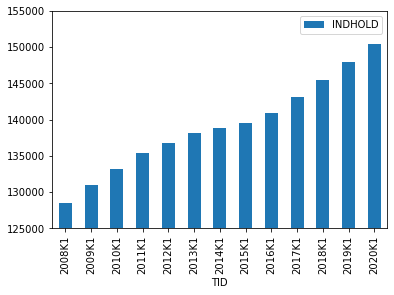

In [55]:
import matplotlib.pyplot as plt
print(Cdata)

Cdata.plot(kind="bar", x="TID", y="INDHOLD")
plt.ylim(125000,155000)


In [56]:
dData= pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&ALDER=*&Tid=2020K3", sep=";")

In [57]:
print(dData)

         CIVILSTAND   ALDER     TID  INDHOLD
0    Gift/separeret   I alt  2020K3  2132092
1    Gift/separeret    0 år  2020K3        0
2    Gift/separeret    1 år  2020K3        0
3    Gift/separeret    2 år  2020K3        0
4    Gift/separeret    3 år  2020K3        0
..              ...     ...     ...      ...
249           Ugift  121 år  2020K3        0
250           Ugift  122 år  2020K3        0
251           Ugift  123 år  2020K3        0
252           Ugift  124 år  2020K3        0
253           Ugift  125 år  2020K3        0

[254 rows x 4 columns]


(0.0, 100.0)

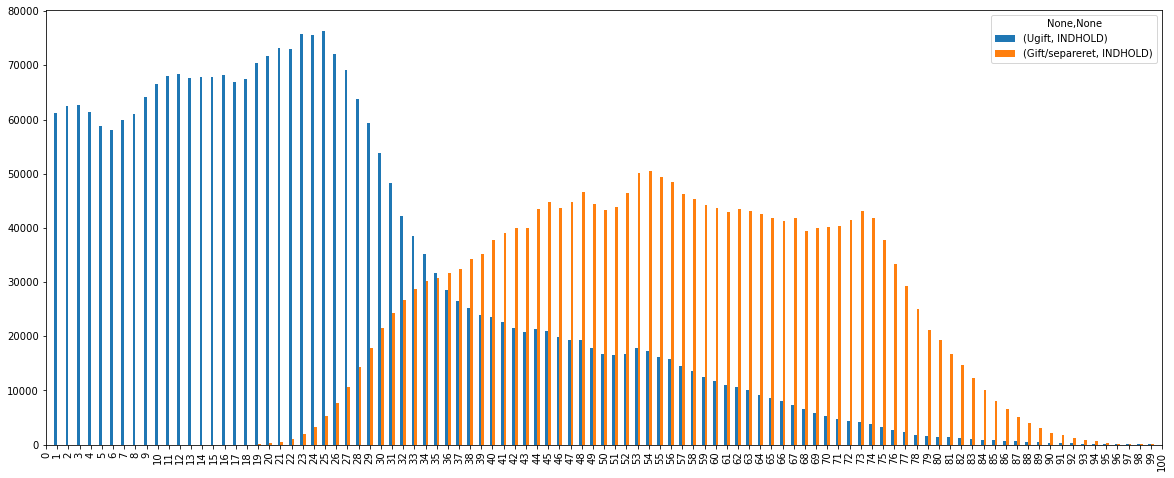

In [68]:
gift = dData[(dData[:]["CIVILSTAND"].str.contains('Gift'))&(dData[:]["ALDER"] != 'I alt')].reset_index(drop=True)
ugift = dData[(dData[:]["CIVILSTAND"].str.contains('Ugift'))&(dData[:]["ALDER"] != 'I alt')].reset_index(drop=True)


data = pd.concat([ugift, gift], axis=1, keys=['Ugift','Gift/separeret'])


data.plot(kind="bar", figsize=(20,8))
plt.xlim(0,100)


